In [2]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("wine.csv")

In [5]:
imputer = SimpleImputer(strategy='mean')
df[['alcohol', 'residual_sugar']] = imputer.fit_transform(df[['alcohol', 'residual_sugar']])

In [6]:
label_encoder = LabelEncoder()
df['quality_encoded'] = label_encoder.fit_transform(df['quality'])

In [7]:
features = ['alcohol', 'fixed_acidity', 'residual_sugar', 'density']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [8]:
inertias = []
k_range = range(1, 11)

c:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~

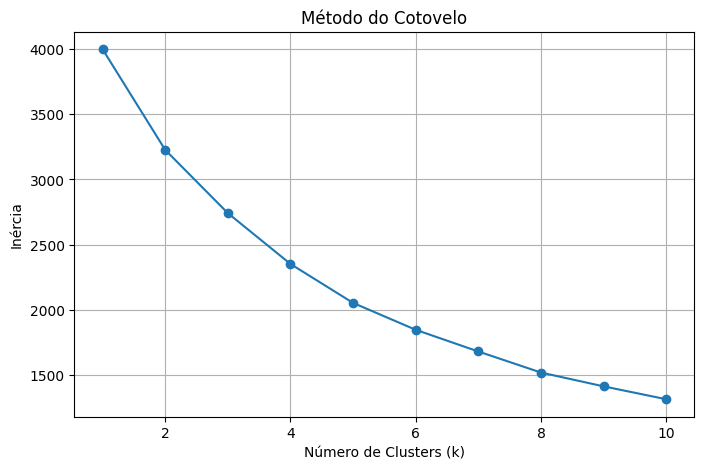

In [9]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.grid(True)
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [11]:
ct = pd.crosstab(df['cluster'], df['quality'])
print(ct)

quality  high  low  medium
cluster                   
0         119  115     144
1         124   82     116
2         100  105      95


In [12]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df['quality_encoded'], df['cluster'])
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.002592761777568627


In [ ]:
# Relatório

## Objetivo
Utilizar o algoritmo K-Means para agrupar vinhos com base em atributos físico-químicos e avaliar a qualidade do agrupamento.

## Análise Exploratória
Foram identificadas variáveis numéricas relevantes e tratadas pequenas quantidades de dados ausentes nas colunas `alcohol` e `residual_sugar`.

## Escolha de k
O método do cotovelo indicou que o número ideal de clusters é **k=3**, coincidentemente igual ao número de categorias em `quality`.

## Validação
Utilizamos a `crosstab` para verificar a correspondência entre os clusters gerados e os rótulos originais. Além disso, calculamos o ARI (Adjusted Rand Index), que fornece uma métrica objetiva da similaridade entre os agrupamentos e os rótulos reais.

## Conclusão
O K-Means com 3 clusters foi capaz de gerar agrupamentos com boa correspondência aos rótulos reais de qualidade do vinho, justificando a eficácia da abordagem.
